In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from autograd.numpy.linalg import inv, det
from autograd import grad
from functools import reduce
import autograd.numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, multinomial, gamma, invwishart
from scipy.special import logsumexp, digamma, loggamma
from numpy.linalg import inv
from util_hmm import *
from gmm_dataset import *

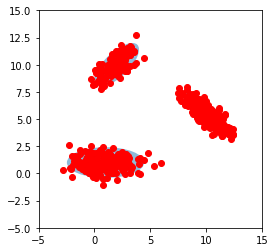

In [2]:
K = 3
N = 500
D = 2
Y = sampling()
plot_samples(Y)

In [7]:
## prior
alpha_init_0 = np.ones(K)
L = np.ones((K, K))  / (2 *(K-1))
alpha_trans_0 = L - np.diag(np.diag(L)) + np.eye(K) * 0.5
m_0 = Y.mean(0)
beta_0 = 1.0
nu_0 = 3.1
W_0 =  (nu_0-D-1) * np.dot((Y - m_0).T, (Y - m_0)) / (N)
cov = np.cov(Y.T)

In [8]:
alpha_init_hat = alpha_init_0
alpha_trans_hat = alpha_trans_0
m_ks = multivariate_normal.rvs(size=K, mean=m_0, cov=cov)
beta_ks = np.tile(beta_0, K)
nu_ks = np.tile(nu_0, K)
W_ks = np.tile(W_0, (K, 1, 1))
# cov_ks = np.tile(cov,(K,1,1)) 

In [9]:
iterations = 10

In [10]:
epoch_elbos = []
for i in range(iterations):
    ## VBE step
    log_gammas, log_eta = vbE_step(alpha_init_hat, alpha_trans_hat, nu_ks, W_ks, m_ks, beta_ks, Y, N, D, K)
    N_ks, Y_ks, S_ks = stats(log_gammas, Y, D, K)
    ## VBM step
    alpha_init_hat, alpha_trans_hat, nu_ks, W_ks, m_ks, beta_ks, cov_ks = vbM_step(log_eta, alpha_init_0, alpha_trans_0, nu_0, W_0, m_0, beta_0, N_ks, Y_ks, S_ks, N, D, K)
    ## elbokl_niw(nu_0, W_0, nu_ks, W_ks, D, K)
    epoch_elbo = elbo(log_gammas, log_eta, alpha_init_0, alpha_trans_0, nu_0, W_0, m_0, beta_0, N_ks, Y_ks, S_ks, alpha_init_hat, alpha_trans_hat, nu_ks, W_ks, m_ks, beta_ks, Y, N, D, K)
#     epoch_elbos.append(epoch_elbo)
#     print('Iteration:%d, ELBO:%f' % ((i+1), epoch_elbo))
# final_covs = cov_ks ## mean of inverse wishart
# final_mus = m_ks ## mean of gaussian

100.67703984932608
NLL : -1350.449007, KL_z : 227.459172, KL_pi : 4.426865, KL_trans : 11.999688, KL_phi 100.677040
108.99859313759235
NLL : -1301.988135, KL_z : 225.783717, KL_pi : 4.426233, KL_trans : 11.981387, KL_phi 108.998593
108.99859314542744
NLL : -1301.988136, KL_z : 225.783716, KL_pi : 4.426233, KL_trans : 11.981387, KL_phi 108.998593
108.9985931454278
NLL : -1301.988136, KL_z : 225.783716, KL_pi : 4.426233, KL_trans : 11.981387, KL_phi 108.998593
108.9985931454278
NLL : -1301.988136, KL_z : 225.783716, KL_pi : 4.426233, KL_trans : 11.981387, KL_phi 108.998593
108.9985931454278
NLL : -1301.988136, KL_z : 225.783716, KL_pi : 4.426233, KL_trans : 11.981387, KL_phi 108.998593
108.9985931454278
NLL : -1301.988136, KL_z : 225.783716, KL_pi : 4.426233, KL_trans : 11.981387, KL_phi 108.998593
108.9985931454278
NLL : -1301.988136, KL_z : 225.783716, KL_pi : 4.426233, KL_trans : 11.981387, KL_phi 108.998593
108.9985931454278
NLL : -1301.988136, KL_z : 225.783716, KL_pi : 4.426233, KL